# Shreenissh Salian
# Fake news Predictor

# Importing the datasets

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Shreenissh
[nltk_data]     Salian\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

# Exploratory Data Analysis

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv("train.csv")



In [5]:
print(df.head())

   id                                              title              author   
0   0  House Dem Aide: We Didn’t Even See Comey’s Let...       Darrell Lucus  \
1   1  FLYNN: Hillary Clinton, Big Woman on Campus - ...     Daniel J. Flynn   
2   2                  Why the Truth Might Get You Fired  Consortiumnews.com   
3   3  15 Civilians Killed In Single US Airstrike Hav...     Jessica Purkiss   
4   4  Iranian woman jailed for fictional unpublished...      Howard Portnoy   

                                                text  label  
0  House Dem Aide: We Didn’t Even See Comey’s Let...      1  
1  Ever get the feeling your life circles the rou...      0  
2  Why the Truth Might Get You Fired October 29, ...      1  
3  Videos 15 Civilians Killed In Single US Airstr...      1  
4  Print \nAn Iranian woman has been sentenced to...      1  


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB
None


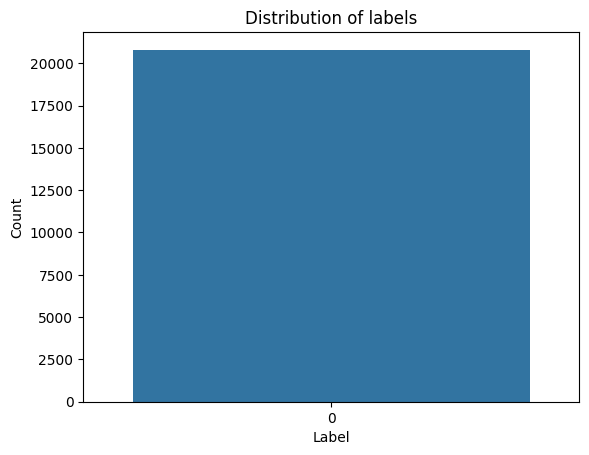

In [7]:
sns.countplot(df['label'])
plt.title('Distribution of labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a CountVectorizer object
vectorizer = CountVectorizer()

# Fit the vectorizer to the text data and transform the text data into a bag-of-words matrix
bow_matrix = vectorizer.fit_transform(df)

# Print the shape of the bag-of-words matrix
print(bow_matrix.shape)


(5, 5)


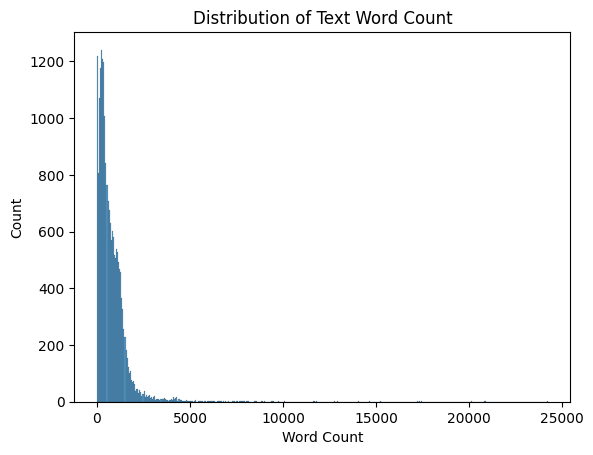

In [9]:
df.dropna(subset=['text'], inplace=True)
df['text_word_count']=df['text'].apply(lambda x:len(x.split()))
sns.histplot(df['text_word_count'])
plt.title('Distribution of Text Word Count')
plt.xlabel('Word Count')
plt.ylabel('Count')
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

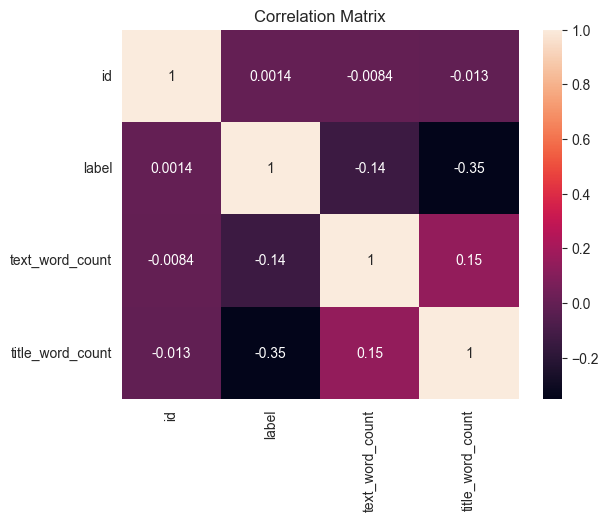

In [55]:
# Drop the column with text values
df_numeric = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_matrix = df_numeric.corr()

# Visualize the correlation matrix
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix')


Data Visualisation

In [10]:
df.describe()

,id,label,text_word_count
count,20761.000000,20761.000000,20761.000000
mean,10401.130341,0.499687,760.308126
std,6005.142716,0.500012,869.525988
min,0.000000,0.000000,0.000000
25%,5201.000000,0.000000,269.000000
50%,10401.000000,0.000000,556.000000
75%,15603.000000,1.000000,1052.000000
max,20799.000000,1.000000,24234.000000


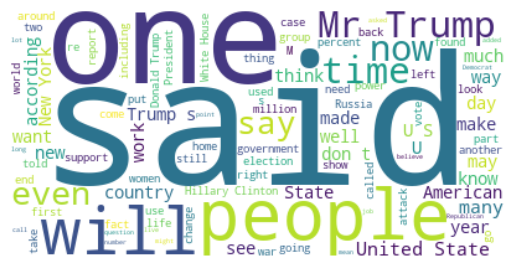

In [11]:
from wordcloud import WordCloud

text = ' '.join(df['text'].astype(str).tolist())
wordcloud = WordCloud(max_words=100, background_color='white').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


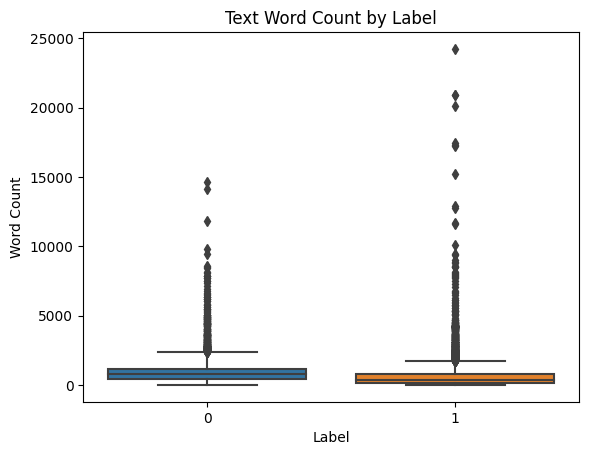

In [12]:
sns.boxplot(x='label', y='text_word_count', data=df)
plt.title('Text Word Count by Label')
plt.xlabel('Label')
plt.ylabel('Word Count')
plt.show()


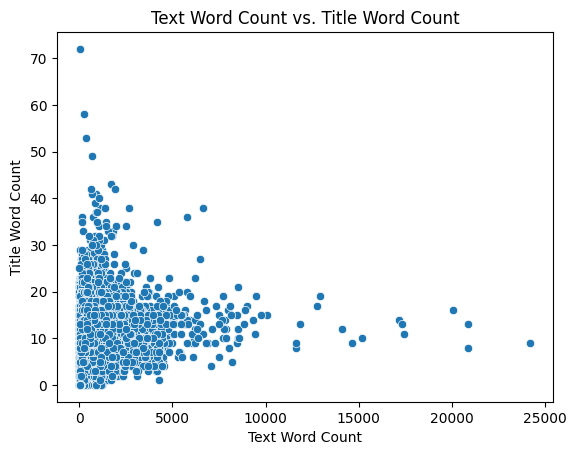

In [13]:
df['title_word_count'] = df['title'].apply(lambda x: len(x.split()) if isinstance(x, str) else 0)

sns.scatterplot(x='text_word_count', y='title_word_count', data=df)
plt.title('Text Word Count vs. Title Word Count')
plt.xlabel('Text Word Count')
plt.ylabel('Title Word Count')
plt.show()


# Data Preprocessing

In [14]:
df.shape

(20761, 7)

In [15]:
df.head()

,id,title,author,text,label,text_word_count,title_word_count
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,820,14
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,710,9
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,1266,7
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,557,10
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,154,14


In [16]:
df.isnull().sum()

id                     0
title                558
author              1918
text                   0
label                  0
text_word_count        0
title_word_count       0
dtype: int64

In [17]:
df=df.fillna('')

In [18]:
#merging author and title
df['content']=df['author']+' '+df['title']

In [19]:
print(df['content'])

0        Darrell Lucus House Dem Aide: We Didn’t Even S...
1        Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2        Consortiumnews.com Why the Truth Might Get You...
3        Jessica Purkiss 15 Civilians Killed In Single ...
4        Howard Portnoy Iranian woman jailed for fictio...
                               ...                        
20795    Jerome Hudson Rapper T.I.: Trump a ’Poster Chi...
20796    Benjamin Hoffman N.F.L. Playoffs: Schedule, Ma...
20797    Michael J. de la Merced and Rachel Abrams Macy...
20798    Alex Ansary NATO, Russia To Hold Parallel Exer...
20799              David Swanson What Keeps the F-35 Alive
Name: content, Length: 20761, dtype: object


In [20]:
X=df.drop(columns='label',axis=1)
Y=df['label']

In [21]:
print(X)
print(Y)

          id                                              title   
0          0  House Dem Aide: We Didn’t Even See Comey’s Let...  \
1          1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2          2                  Why the Truth Might Get You Fired   
3          3  15 Civilians Killed In Single US Airstrike Hav...   
4          4  Iranian woman jailed for fictional unpublished...   
...      ...                                                ...   
20795  20795  Rapper T.I.: Trump a ’Poster Child For White S...   
20796  20796  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
20797  20797  Macy’s Is Said to Receive Takeover Approach by...   
20798  20798  NATO, Russia To Hold Parallel Exercises In Bal...   
20799  20799                          What Keeps the F-35 Alive   

                                          author   
0                                  Darrell Lucus  \
1                                Daniel J. Flynn   
2                             Consortiu

# Stemming

In [22]:
port_stem=PorterStemmer()

In [23]:
def stemming(content):
  stemmed_content=re.sub('[^a-zA-Z]',' ',content)
  stemmed_content=stemmed_content.lower()
  stemmed_content=stemmed_content.split()
  stemmed_content=[port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
  stemmed_content=' '.join(stemmed_content)
  return stemmed_content

In [24]:
df['content']=df['content'].apply(stemming)

In [25]:
print(df['content'])

0        darrel lucu hous dem aid even see comey letter...
1        daniel j flynn flynn hillari clinton big woman...
2                   consortiumnew com truth might get fire
3        jessica purkiss civilian kill singl us airstri...
4        howard portnoy iranian woman jail fiction unpu...
                               ...                        
20795    jerom hudson rapper trump poster child white s...
20796    benjamin hoffman n f l playoff schedul matchup...
20797    michael j de la merc rachel abram maci said re...
20798    alex ansari nato russia hold parallel exercis ...
20799                            david swanson keep f aliv
Name: content, Length: 20761, dtype: object


In [26]:
#separating the data and label
X=df['content'].values
Y=df['label'].values

In [27]:
print(X)

['darrel lucu hous dem aid even see comey letter jason chaffetz tweet'
 'daniel j flynn flynn hillari clinton big woman campu breitbart'
 'consortiumnew com truth might get fire' ...
 'michael j de la merc rachel abram maci said receiv takeov approach hudson bay new york time'
 'alex ansari nato russia hold parallel exercis balkan'
 'david swanson keep f aliv']


In [28]:
print(Y)

[1 0 1 ... 0 1 1]


In [29]:
#converting the textual data to numerical data
vectorizer=TfidfVectorizer()
vectorizer.fit(X)

X=vectorizer.transform(X)

In [30]:
print(X)

  (0, 15534)	0.28484839382359867
  (0, 13344)	0.2565797237055283
  (0, 8819)	0.36361560069704985
  (0, 8544)	0.2921248817068552
  (0, 7613)	0.2478398696118434
  (0, 6928)	0.21872143133600472
  (0, 4910)	0.23330067979055175
  (0, 3746)	0.27052710412864495
  (0, 3555)	0.35991212979811754
  (0, 2923)	0.24683241275458936
  (0, 2454)	0.36767229408002416
  (0, 263)	0.27009498808160637
  (1, 16638)	0.3007095078153714
  (1, 6740)	0.1904663517177972
  (1, 5438)	0.7143463265050893
  (1, 3523)	0.263719162963963
  (1, 2778)	0.19094659329911978
  (1, 2195)	0.382747546433888
  (1, 1868)	0.15517018061483198
  (1, 1475)	0.2939792831498172
  (2, 15459)	0.41545041426581664
  (2, 9526)	0.4935396087216282
  (2, 5898)	0.34744131866696565
  (2, 5324)	0.3866450296270738
  (2, 3064)	0.4609896163315894
  :	:
  (20758, 12996)	0.24781657559616727
  (20758, 12227)	0.27216265384498983
  (20758, 12022)	0.2473472090241594
  (20758, 10206)	0.08019724282245004
  (20758, 9494)	0.17422582401485676
  (20758, 9425)	0.2949

# Splitting the dataset to training and test data

In [31]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

# Evaluation

# Training the logistic regression model

In [32]:
model=LogisticRegression()

In [33]:
model.fit(X_train,Y_train)

LogisticRegression()

In [34]:
X_train_prediction=model.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)

In [35]:
print("Accuracy score of the training data:",training_data_accuracy)

Accuracy score of the training data: 0.9871146435452793


In [36]:
X_test_prediction=model.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction,Y_test)

In [37]:
print("Accuracy score of the test data:",test_data_accuracy)

Accuracy score of the test data: 0.9766433903202504


# Training the Decision Tree Classifier




In [38]:
from sklearn.tree import DecisionTreeClassifier


In [39]:
from sklearn.tree import DecisionTreeClassifier
depth_num= range(50, 71, 2)
training_acc= []
testing_acc = []
for depth in depth_num:
    tree_model = DecisionTreeClassifier(max_depth=depth,random_state=42)
    tree_model.fit(X_train,Y_train)
    training_acc.append(tree_model.score(X_train,Y_train))
    testing_acc.append(tree_model.score(X_test,Y_test))

In [40]:
depth_num= range(50, 71, 2)
training_acc= []
testing_acc = []
for depth in depth_num:
    tree_model = DecisionTreeClassifier(max_depth=depth,random_state=42)
    tree_model.fit(X_train,Y_train)
    training_acc.append(tree_model.score(X_train,Y_train))
    testing_acc.append(tree_model.score(X_test,Y_test))

In [41]:
print("Training Accuracy Scores:", training_acc[:3])
print("testing Accuracy Scores:", testing_acc[:3])

Training Accuracy Scores: [0.996266859344894, 0.9966883429672447, 0.9971098265895953]
testing Accuracy Scores: [0.9910907777510234, 0.9915723573320491, 0.991813147122562]


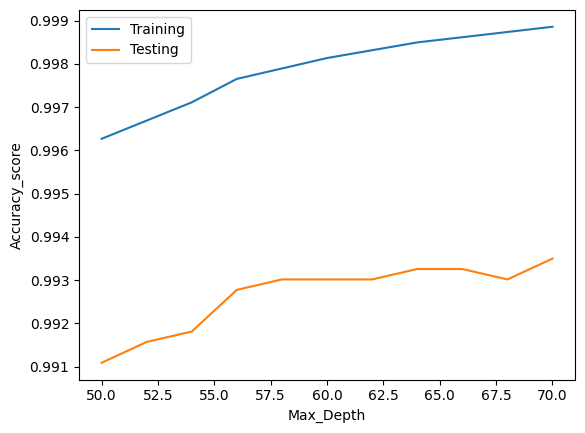

In [42]:
plt.plot(depth_num , training_acc , label= 'Training')
plt.plot(depth_num , testing_acc , label= 'Testing')
plt.xlabel('Max_Depth')
plt.ylabel('Accuracy_score')
plt.legend();

# Training the SVM model

In [43]:
from sklearn import svm

In [44]:
svc_model= svm.SVC()

In [45]:
def train(model, name):
    model.fit(X_train, Y_train)
    acc_train = model.score(X_train, Y_train)
    acc_test = model.score(X_test, Y_test)
    print(f"{name} Training Accuracy: {acc_train:.4f}")
    print(f"{name} Testing Accuracy: {acc_test:.4f}")


In [46]:
train(svc_model, 'SVM')

SVM Training Accuracy: 0.9992
SVM Testing Accuracy: 0.9887


# Comparing between the three models

In [47]:
def train(model , model_name):
    model.fit(X_train,y_train)
    print(f"Training accuracy of {model_name} is {model.score(X_train,y_train)}")
    print(f"testing accuracy of {model_name} is {model.score(X_test,y_test)}")
def conf_matrix(model):
    ConfusionMatrixDisplay.from_estimator(
        model,
        X_test,
        y_test
    )
def class_report(model):
    print(classification_report(
        y_test,
        model.predict(X_test)
    ))

In [48]:
models = pd.DataFrame({
    "Models": ["Logistic Regression", "SVM", "Decision Tree"],
    "Score": [model.score(X_test, Y_test), svc_model.score(X_test, Y_test), max(testing_acc)]
})

models.sort_values(by="Score", ascending=False)


,Models,Score
2,Decision Tree,0.993499
1,SVM,0.988683
0,Logistic Regression,0.976643


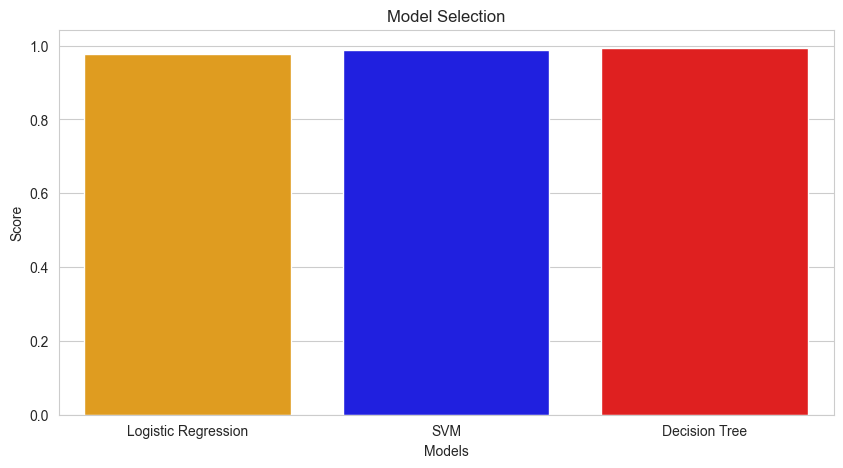

In [49]:
colors= ['orange' , 'blue','red']
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
sns.barplot(x=models['Models'],y=models['Score'], palette=colors )
plt.xlabel("Models")
plt.ylabel("Score")
plt.title("Model Selection")
plt.show();

# Making a predictive data

In [50]:
X_new=X_test[1]

prediction=model.predict(X_new)
print(prediction)

if (prediction[0]==0):
  print("The news is real")
else:
  print("The news is fake")

[0]
The news is real


In [51]:
print(Y_test[1])

0
